**2347215 Arunoth Symen A**             
*Lab Program 1- AND, ORAAND-NOT, XOR gates*

##1. AND Gate Classification

Training with random weights:
Testing the Perceptron:
Inputs: [0 0], Target: 0, Prediction: 0
Inputs: [0 1], Target: 0, Prediction: 0
Inputs: [1 0], Target: 0, Prediction: 0
Inputs: [1 1], Target: 1, Prediction: 1

Training with defined (zero) weights:
Testing the Perceptron:
Inputs: [0 0], Target: 0, Prediction: 0
Inputs: [0 1], Target: 0, Prediction: 0
Inputs: [1 0], Target: 0, Prediction: 0
Inputs: [1 1], Target: 1, Prediction: 1


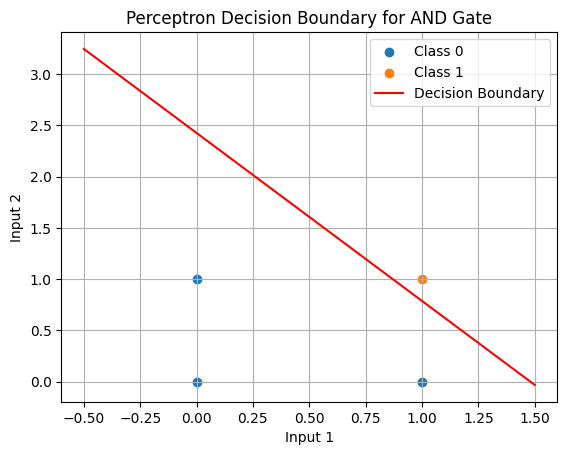

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the dataset (AND gate truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100, random_weights=True):
        self.lr = learning_rate
        self.epochs = epochs
        if random_weights:
            self.weights = np.random.rand(input_size + 1)  # +1 for bias
        else:
            self.weights = np.zeros(input_size + 1)

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.lr * (label - prediction) * inputs
                self.weights[0] += self.lr * (label - prediction)

# Function to test the perceptron
def test_perceptron(perceptron, X, y):
    print("Testing the Perceptron:")
    for inputs, label in zip(X, y):
        prediction = perceptron.predict(inputs)
        print(f"Inputs: {inputs}, Target: {label}, Prediction: {prediction}")

# Train and test with random weights
print("Training with random weights:")
perceptron_random = Perceptron(input_size=2, random_weights=True)
perceptron_random.train(X, y)
test_perceptron(perceptron_random, X, y)

# Train and test with defined (zero) weights
print("\nTraining with defined (zero) weights:")
perceptron_defined = Perceptron(input_size=2, random_weights=False)
perceptron_defined.train(X, y)
test_perceptron(perceptron_defined, X, y)

# Visualize decision boundary
def plot_decision_boundary(perceptron, X, y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] + perceptron.weights[1] * x1) / perceptron.weights[2]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('Perceptron Decision Boundary for AND Gate')
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron_random, X, y)

#**Questions:**


###**How do the weights and bias values change during training for the AND gate?**

During training for the AND gate, the weights and bias typically evolve to positive values for both inputs and a negative bias. This configuration allows the perceptron to output 1 only when both inputs are 1, effectively creating a decision boundary that separates the (1,1) point from the others in the input space.

###**Can the perceptron successfully learn the AND logic with a linear decision boundary?**

Yes, the perceptron can successfully learn the AND logic with a linear decision boundary. The AND function is linearly separable, allowing a single straight line to correctly classify all input combinations, which is achievable by a simple perceptron model.

##**OR Gate Classification**

Testing the OR Gate Perceptron:
Inputs: [0 0], Target: 0, Prediction: 0
Inputs: [0 1], Target: 1, Prediction: 1
Inputs: [1 0], Target: 1, Prediction: 1
Inputs: [1 1], Target: 1, Prediction: 1

Classification Accuracy: 100.0%


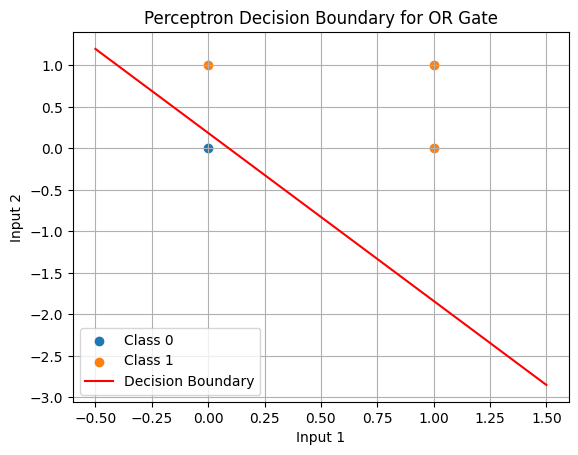

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare the dataset (OR gate truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(input_size + 1)  # +1 for bias

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.lr * (label - prediction) * inputs
                self.weights[0] += self.lr * (label - prediction)

# Function to test the perceptron
def test_perceptron(perceptron, X, y):
    print("Testing the OR Gate Perceptron:")
    correct = 0
    for inputs, label in zip(X, y):
        prediction = perceptron.predict(inputs)
        print(f"Inputs: {inputs}, Target: {label}, Prediction: {prediction}")
        if prediction == label:
            correct += 1
    accuracy = correct / len(y) * 100
    print(f"\nClassification Accuracy: {accuracy}%")

# Train and test the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)
test_perceptron(perceptron, X, y)

# Visualize decision boundary
def plot_decision_boundary(perceptron, X, y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] + perceptron.weights[1] * x1) / perceptron.weights[2]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('Perceptron Decision Boundary for OR Gate')
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron, X, y)

#**Questions:**

###**What changes in the perceptron's weights are necessary to represent the OR gate logic?**

For the OR gate, the perceptron's weights typically evolve to have positive values for both inputs, but with smaller magnitudes compared to the AND gate. The bias becomes less negative (or even slightly positive) to allow the perceptron to output 1 when either or both inputs are 1.

###**How does the linear decision boundary look for the OR gate classification?**

The linear decision boundary for the OR gate classification typically appears as a line that separates the (0,0) point from the other three points (0,1), (1,0), and (1,1) in the input space. This line usually runs diagonally from the bottom-right to the top-left of the plot, effectively isolating the (0,0) case.

#**AND-NOT Gate Classification**

Testing the AND-NOT Gate Perceptron:
Inputs: [0 0], Target: 0, Prediction: 0
Inputs: [0 1], Target: 0, Prediction: 0
Inputs: [1 0], Target: 1, Prediction: 1
Inputs: [1 1], Target: 0, Prediction: 0

Classification Accuracy: 100.0%


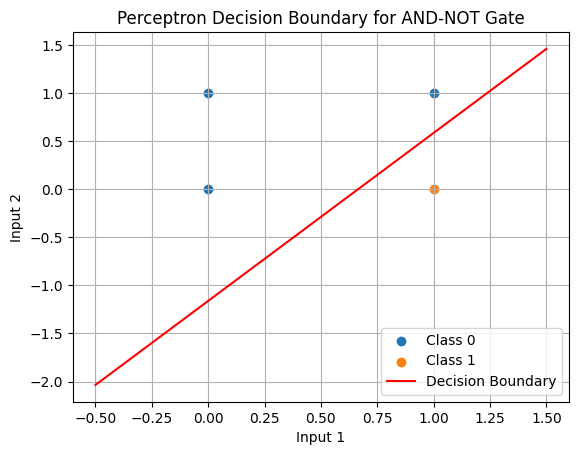

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the dataset (AND-NOT gate truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 1, 0])

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(input_size + 1)  # +1 for bias

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.lr * (label - prediction) * inputs
                self.weights[0] += self.lr * (label - prediction)

# Function to test the perceptron
def test_perceptron(perceptron, X, y):
    print("Testing the AND-NOT Gate Perceptron:")
    correct = 0
    for inputs, label in zip(X, y):
        prediction = perceptron.predict(inputs)
        print(f"Inputs: {inputs}, Target: {label}, Prediction: {prediction}")
        if prediction == label:
            correct += 1
    accuracy = correct / len(y) * 100
    print(f"\nClassification Accuracy: {accuracy}%")

# Train and test the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)
test_perceptron(perceptron, X, y)

# Visualize decision boundary
def plot_decision_boundary(perceptron, X, y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] + perceptron.weights[1] * x1) / perceptron.weights[2]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('Perceptron Decision Boundary for AND-NOT Gate')
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron, X, y)

##**Questions:**

###**What is the perceptron's weight configuration after training for the AND-NOT gate?**

For the AND-NOT gate, the perceptron's weight configuration typically evolves to a positive weight for the first input, a negative weight for the second input, and a bias that allows it to output 1 only when the first input is 1 and the second is 0.





###**How does the perceptron handle cases where both inputs are 1 or 0?**


For the AND-NOT gate, when both inputs are 1, the perceptron's output is typically 0 due to the negative weight on the second input canceling out the positive weight on the first. When both inputs are 0, the perceptron also outputs 0, as neither input contributes enough to overcome the bias.


#**XOR Gate Classification**

Testing the XOR Gate Perceptron:
Inputs: [0 0], Target: 0, Prediction: 1
Inputs: [0 1], Target: 1, Prediction: 1
Inputs: [1 0], Target: 1, Prediction: 0
Inputs: [1 1], Target: 0, Prediction: 0

Classification Accuracy: 50.0%


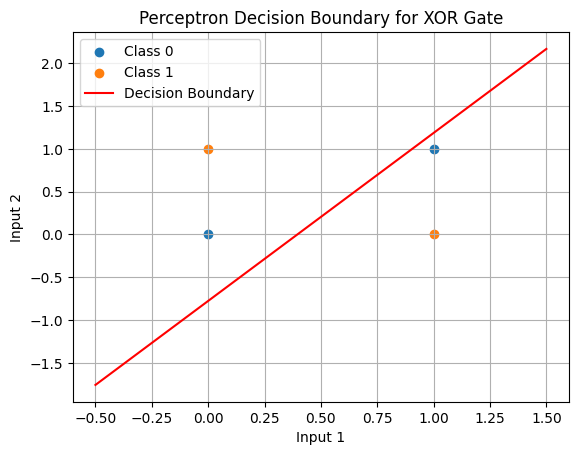

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the dataset (XOR gate truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(input_size + 1)  # +1 for bias

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation_function(summation)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                self.weights[1:] += self.lr * (label - prediction) * inputs
                self.weights[0] += self.lr * (label - prediction)

# Function to test the perceptron
def test_perceptron(perceptron, X, y):
    print("Testing the XOR Gate Perceptron:")
    correct = 0
    for inputs, label in zip(X, y):
        prediction = perceptron.predict(inputs)
        print(f"Inputs: {inputs}, Target: {label}, Prediction: {prediction}")
        if prediction == label:
            correct += 1
    accuracy = correct / len(y) * 100
    print(f"\nClassification Accuracy: {accuracy}%")

# Train and test the perceptron
perceptron = Perceptron(input_size=2)
perceptron.train(X, y)
test_perceptron(perceptron, X, y)

# Visualize decision boundary
def plot_decision_boundary(perceptron, X, y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] + perceptron.weights[1] * x1) / perceptron.weights[2]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('Perceptron Decision Boundary for XOR Gate')
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron, X, y)

##**Questions:**

###**Why does the Single Layer Perceptron struggle to classify the XOR gate?**

The Single Layer Perceptron struggles to classify the XOR gate because XOR is not linearly separable. No single straight line can separate the two classes (0 and 1) in the input space, which is a fundamental limitation of the simple perceptron model.

###**What modifications can be made to the neural network model to handle the XOR gate correctly?**

To handle the XOR gate correctly, the model can be modified to a multi-layer perceptron with at least one hidden layer. Alternatively, using non-linear activation functions or combining outputs from two separate perceptrons can also solve the XOR problem.